# Introduction on Using Python to access GeoNet's GNSS data

## &nbsp; Table of contents
### 1. Introduction
### 2. Set Up 
### 3. Get GNSS data
### 4. Plot data 
### 5. Save data

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use Python to be able to access GNSS(commonly referred to at GPS) data of the GNSS sensors in GeoNets network.
GeoNet has a API (Application programming interface) to access it's GNSS data. For more on this go to https://fits.geonet.org.nz/api-docs/. Note you do not need to know anything about APIs to be able to use this tutorial

You will need to install the package pandas (https://pandas.pydata.org/) useing `pip install (package name)` in the terminal / command prompt.

This tutorial assumes that you have basic knowledge of Python. We will be useing the package `pandas` (https://pandas.pydata.org/)

###### About Geonet GNSS data

GeoNet uses GNSS technology to work out the precisely positions of over 190 stations in and around NZ everyday.
This is used to work out the displacement of the station from it's initial position, so we can know how much the surface of the earth is moveing. <br>
This data has 3 components:
<ul>
    <li> The displacement in the east west driction where east is a positive displacement. This has a typeID of "e"
    <li> The displacement in the north south driction where north is a positive displacement. This has a typeID of "n"
    <li> The displacement in the up down driction where up is a positive displacement. This has a typeID of "u"</ul>
For more on data types go to http://fits.geonet.org.nz/type (for best formatting use firefox)   

## &nbsp; 2. Set Up

###### Import packages

In [2]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Note that `requests`, `datetime` and `matplotlib` as all base packages you will not into install in the command prompt. 
For more information on these packages run `help(package_name)`

###### Set URL and endpoint

In [3]:
base_url = "http://fits.geonet.org.nz/"
endpoint = "observation"

The base URL should be set as above, and the endpoint is set to observation to get the observation data. There are other endpoints which will return different information such as plot and site. To learn more go to https://fits.geonet.org.nz/api-docs/

###### Combine URL and endpoint

In [4]:
url = base_url + endpoint

Combine the base URL and the endpoint to give you the URL to put into your data request.

## &nbsp; 3. Get GNSS data

In this section we will learn how to get all the GNSS observation data from a site and put it into a dataframe so we can plot and save the data. 

###### Set parameters

In [5]:
parameters ={"typeID": "e", "siteID": "HANM"}

Set the parameters to get the east component(`'typeID':'e'`) of the site in the Hanmer Basin with the siteID HANM (`'siteID': 'HANM'`). To Find these 4 letter site IDs you can use https://www.geonet.org.nz/data/network/sensor/search and search for GNSS antenna. 

##### Get GNSS east data

In [6]:
response_e = requests.get(url, params=parameters)

Use `requests.get` to ger that data using the URL made before and the parameters

###### Get other GNSS data

In [7]:
parameters["typeID"] = "n"
response_n = requests.get(url, params=parameters)
parameters["typeID"] = "u"
response_u = requests.get(url, params=parameters)

Change the typeID to get the other components

###### Check that your requests for data worked 

In [9]:
print ("The Response status code of the east channle is", response_e.status_code)
print ("The Response status code of the north channle is",response_n.status_code)
print ("The Response status code of the up channle is",response_u.status_code)

The Response status code of the east channle is 200
The Response status code of the north channle is 200
The Response status code of the up channle is 200


The response status code says if we were successful in getting the data and why where not if we were unsuccessful.
<ul>
<li>200 -- everything went okay, and the result has been returned (if any)
<li>301 -- the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
<li>401 -- the server thinks you're not authenticated. This happens when you don't send the right credentials to access an API
<li>400 -- the server thinks you made a bad request. This can happen when you don't send along the right data, among other things.
<li>403 -- the resource you're trying to access is forbidden -- you don't have the right permissions to see it.
<li>404 -- the resource you tried to access wasn't found on the server.
</ul>

Now that we know our request for data was successful we want to transform it into a format that we can deal with in python. Right now, the data is one long string. 

###### Split the string of data

In [15]:
data_e = response_e.content.decode("utf-8").split("\n")

The above code decode the response content and then splits the east data on the new line symbol as each line is one point of data. If in python2 use remove the code `.decode("utf-8")`

###### Split the points of data

In [16]:
for i in range(0, len(data_e)):
    data_e[i]= data_e[i].split(",")

The above code uses a for loop to split each point of data on the "," symbol as each value is separated by a "," 

###### Reformatted data values

In [17]:
for i in range(1, (len(data_e)-1)):
    data_e[i][0] = datetime.datetime.strptime(data_e[i][0], '%Y-%m-%dT%H:%M:%S.%fZ') #make 1st value into a time
    data_e[i][1] = float(data_e[i][1]) #makes 2nd value into a number
    data_e[i][2] = float(data_e[i][2]) #makes 3rd value into a number

The above code uses a for loop to go over each point of data are reformatted it so that the first value in each point is seen as a time by the code, and the second and third values are seen as numbers by the code.<br>
Note that we miss the first and last data points in our loop as the first data point has the names of the data values and the last point is empty due to how we split it. 

###### Make into data frame

In [18]:
df_e = pd.DataFrame(data_e[1:-1],index = range(1, (len(data_e)-1)), columns=data_e[0])

`data_e[1:-1]` makes the list of data be the data in the data frame, `index = range(1, (len(data_e)-1))` makes the rows named 1, 2, ... 1656 where 1656 is the number of data points, and  `columns=data_e[0]`gives the columns the names that where in the first line of that string of received data.

###### Print the first few lines of the data frame

In [19]:
df_e.head()

,date-time,e (mm),error (mm)
1,2014-06-04 11:59:00,-300.96,2.02
2,2014-06-05 11:59:00,-296.14,1.66
3,2014-06-06 11:59:00,-291.96,1.87
4,2014-06-07 11:59:00,-295.45,1.82
5,2014-06-08 11:59:00,-296.37,1.65


Here we can see on the 4th of June 2014 the site HANM had moved 300.73 mm west &plusmn; 2.02 mm from its initial position.

###### Make everything we have just done into a function 

In [20]:
def GNSS_dataframe(data):
    """
    This function turns the string of GNSS data received by requests.get
    into a data frame with GNSS data correctly formatted.
    """
    data = data.split("\n") # splits data on the new line symbol
    for i in range(0, len(data)):
        data[i]= data[i].split(",")# splits data ponits on the , symbol
    for i in range(1, (len(data)-1)):
        data[i][0] = datetime.datetime.strptime(data[i][0], '%Y-%m-%dT%H:%M:%S.%fZ') #make 1st value into a time
        data[i][1] = float(data[i][1]) #makes 2nd value into a number
        data[i][2] = float(data[i][2]) #makes 3rd value into a number
    df = pd.DataFrame(data[1:-1],index = range(1, (len(data)-1)), columns=data[0]) #make the list into a data frame
    return df 

This makes code cells 8 to 11 into a function to be called later in the notebook.

###### Run the above function on the North and Up data 

In [21]:
df_n = GNSS_dataframe(response_n.content.decode("utf-8"))
df_u = GNSS_dataframe(response_u.content.decode("utf-8"))

Make sure to run this function on the content string of the requested data. If in python2 use remove the code `.decode("utf-8")`

##### Why make the data into a data frame?

A data frame is a way of formatting data into a table with column and row name much like a csv file and makes long list of data a lot easier to use.  
Data frame data can be called column or row name making it easy to get the point/s of data you want. 
Data, much like in a table can be “linked” so that I can do something like plot a data point on a 2D plot.
Sadly, data frames are not a built-in data format in Python, so we must use the pandas (https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) package to be able to make a data frame.  

## &nbsp; 4. Plot data

###### Plot the East data

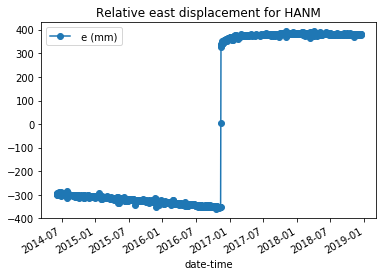

In [22]:
e_plot = df_e.plot(x='date-time', y= ' e (mm)', marker='o', title = 'Relative east displacement for HANM')
#plt.savefig("e_plot") 

The above code plots time on the x axis and the displacement in millimetres on the y axis. `marker = ‘o’` makes each point of data a small circle. If you want to save the plot as a png in the folder you are running this code from you can uncomment ` plt.savefig("e_plot")`

###### Plot the North data

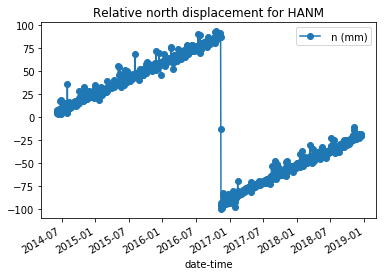

In [23]:
n_plot = df_n.plot(x='date-time', y= ' n (mm)', marker='o', title = 'Relative north displacement for HANM')
#plt.savefig("n_plot") 

###### Plot the Up data

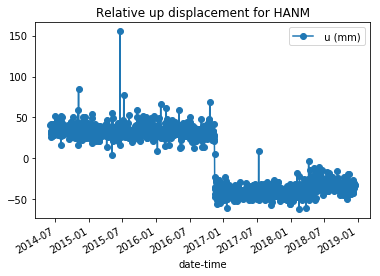

In [24]:
u_plot = df_u.plot(x='date-time', y= ' u (mm)', marker='o', title='Relative up displacement for HANM')
#plt.savefig("u_plot") 

## &nbsp; 5. Save data

##### Make a copy of the east data frame

In [25]:
df = df_e

This makes what is call a deep copy of the data frame with the east data in it. This means that when I edit `df` I do not edit `df_e`.

###### Remove the error column from this copy

In [26]:
df = df.drop(" error (mm)",axis=1)

The above code removes the column called error (mm) and all its data from `df`. ` axis=1` says that we are looking for a column. If we put ` axis=0` we would be looking for a row. 

###### Add the up and north data to this data frame

In [27]:
df["u (mm)"] =  df_u[' u (mm)']
df["n (mm)"] =  df_n[' n (mm)']

This adds the up and north data to the data frame `df`.

###### Print the first few lines of the data frame

In [28]:
df.head()

,date-time,e (mm),u (mm),n (mm)
1,2014-06-04 11:59:00,-300.96,40.81,7.43
2,2014-06-05 11:59:00,-296.14,32.36,5.19
3,2014-06-06 11:59:00,-291.96,30.32,4.75
4,2014-06-07 11:59:00,-295.45,41.92,6.38
5,2014-06-08 11:59:00,-296.37,26.38,5.59


Here we can see the lay out of the data frame with the columns date, east displacement, up displacement and north displacement. 

###### Save as CSV file

In [29]:
df.to_csv("HANM.csv")

This saves the data frame `df` csv files with the same formatting as the data frame. It will have saved in the same place as this notebook is run from and be named HANM

## Useful links

<ul>
    <li>This notebook uses Python https://www.python.org/
    <li>This notebook also uses pandas https://pandas.pydata.org/
    <li>There is a notebook on this data set in R at (link to put in)
    <li>More tutorials on GNSS data can be found at (link to right place in github)     
    <li>To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
    <li>For more on data types in FITS go to http://fits.geonet.org.nz/type (for best formatting use firefox)
    <li>For more on FITS go to https://fits.geonet.org.nz/api-docs/   
</ul>